In [34]:
import sys
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf

my_libs_dir = '../'
if not my_libs_dir in sys.path:
    sys.path.append(my_libs_dir)  # add the path to my_lib directory 

# The following lines are needed to auto-reload my library file
# Without these lines, my library file is read only once and
# modifications of my library file are not reflected.
%load_ext autoreload
%autoreload 1
%aimport my_libs.linear_reg
# import from my library file
from my_libs.linear_reg import step_aic_forward, calc_vifs


In [20]:
csv_in = 'winequality-red_modified-utf8.txt'
df_all = pd.read_csv(csv_in, delimiter='\s+', skiprows=13)
print(df_all.shape)
print(df_all.info())
display(df_all.head())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,NaN,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,NaN,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,NaN,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
display(df_all[df_all.isnull().any(axis=1)])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,NaN,3.20,0.68,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,NaN,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,NaN,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df_all = df_all.dropna().reset_index(drop=True)
print(df_all.shape)


(1596, 12)


##### Separate explanatory variables and objective variable  


In [24]:
X_all_org = df_all.loc[:, 'fixed_acidity':'alcohol']  # explanatory variables
y = df_all['quality']  # objective variable
print('X_all_org:', X_all_org.shape)
display(X_all_org.head())
print('y:', y.shape)
print(y.head())

X_all_org: (1596, 11)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


y: (1596,)
0    5
1    5
2    5
3    5
4    7
Name: quality, dtype: int64


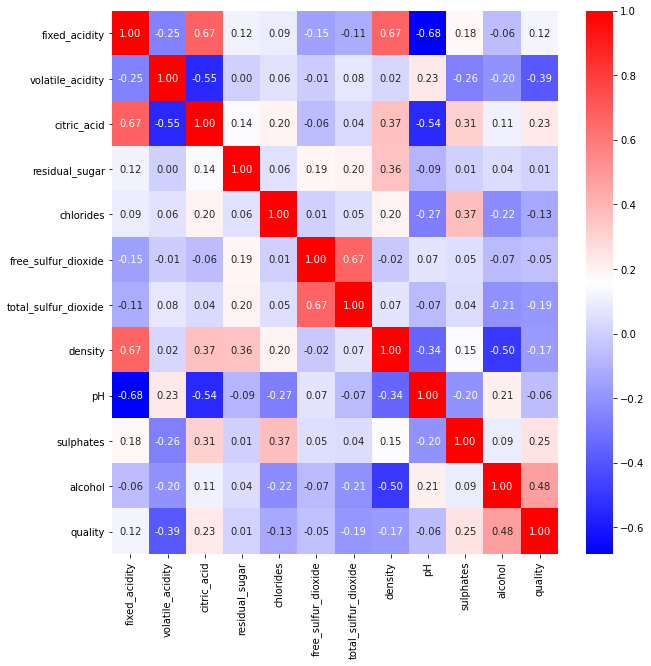

In [25]:
corr_all = df_all.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_all,annot=True,fmt='.2f',cmap='bwr')
plt.show()

In [27]:
X_all = X_all_org
X_all_c = sm.add_constant(X_all)
model = sm.OLS(y, X_all_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.03
Date:                Tue, 11 May 2021   Prob (F-statistic):          6.17e-145
Time:                        23:41:04   Log-Likelihood:                -1567.6
No. Observations:                1596   AIC:                             3159.
Df Residuals:                    1584   BIC:                             3224.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.6728 

#### Standardizing

In [30]:
X_scaled = preprocessing.scale(X_all)
y_scaled = preprocessing.scale(y)
model = sm.OLS(y_scaled, X_scaled)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.360
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              81.08
Date:                Tue, 11 May 2021   Prob (F-statistic):                   4.95e-145
Time:                        23:47:34   Log-Likelihood:                         -1908.4
No. Observations:                1596   AIC:                                      3839.
Df Residuals:                    1585   BIC:                                      3898.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
dfX_scaled = pd.DataFrame(X_scaled, columns=X_all.columns)
dfy_scaled = pd.Series(y_scaled, name=y.name)
exog = list(dfX_scaled.columns)  # Initial set = all explanatory variables
endog = [dfy_scaled.name]  # Objective variables
df_scaled = pd.concat([dfX_scaled, dfy_scaled], axis=1)

In [35]:
results_aic=step_aic_forward(smf.ols, exog, endog, data=df_scaled)


AIC: 4531.252, formula: quality ~ 1
AIC: 4123.148, formula: quality ~ alcohol
AIC: 4450.253, formula: quality ~ citric_acid
AIC: 4532.954, formula: quality ~ residual_sugar
AIC: 4270.337, formula: quality ~ volatile_acidity
AIC: 4483.646, formula: quality ~ density
AIC: 4506.508, formula: quality ~ chlorides
AIC: 4508.780, formula: quality ~ fixed_acidity
AIC: 4528.011, formula: quality ~ pH
AIC: 4529.172, formula: quality ~ free_sulfur_dioxide
AIC: 4477.538, formula: quality ~ total_sulfur_dioxide
AIC: 4428.999, formula: quality ~ sulphates
AIC: 4061.342, formula: quality ~ alcohol + citric_acid
AIC: 4125.070, formula: quality ~ alcohol + residual_sugar
AIC: 3928.074, formula: quality ~ alcohol + volatile_acidity
AIC: 4114.882, formula: quality ~ alcohol + density
AIC: 4123.949, formula: quality ~ alcohol + chlorides
AIC: 4076.123, formula: quality ~ alcohol + fixed_acidity
AIC: 4072.263, formula: quality ~ alcohol + pH
AIC: 4124.514, formula: quality ~ alcohol + free_sulfur_dioxide
A

In [38]:
endogs = results_aic.model.endog_names
exogs = results_aic.model.exog_names.copy()
print(exogs)
exogs.remove('Intercept')
#print(exogs)  # debug
X_c = sm.add_constant(X_all[exogs])
vifs = calc_vifs(X_c, y)
display(vifs)

['Intercept', 'alcohol', 'volatile_acidity', 'sulphates', 'total_sulfur_dioxide', 'chlorides', 'pH', 'free_sulfur_dioxide']


,VIF
const,618.539992
alcohol,1.220248
volatile_acidity,1.242579
sulphates,1.322258
total_sulfur_dioxide,1.943518
chlorides,1.333407
pH,1.255038
free_sulfur_dioxide,1.882888


In [39]:
X_final_scaled = dfX_scaled[exogs]
model_final_scaled = sm.OLS(y_scaled, X_final_scaled)
results_final_scaled = model_final_scaled.fit()
print(results_final_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.359
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              127.1
Date:                Wed, 12 May 2021   Prob (F-statistic):                   1.48e-148
Time:                        00:05:50   Log-Likelihood:                         -1909.7
No. Observations:                1596   AIC:                                      3833.
Df Residuals:                    1589   BIC:                                      3871.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [53]:
X_final_c = sm.add_constant(X_all[exogs])
model_final = sm.OLS(y, X_final_c)
results_final = model_final.fit()
print(results_final.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 12 May 2021   Prob (F-statistic):          1.85e-148
Time:                        00:21:30   Log-Likelihood:                -1568.9
No. Observations:                1596   AIC:                             3154.
Df Residuals:                    1588   BIC:                             3197.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4260 

In [54]:
print('R2:', results_final.rsquared)
print('Adj R2:', results_final.rsquared_adj)

R2: 0.3589972226304372
Adj R2: 0.3561716436369946


In [58]:
print(results_final.params.sort_values(ascending=False))

const                   4.426027
sulphates               0.884003
alcohol                 0.289401
free_sulfur_dioxide     0.005091
total_sulfur_dioxide   -0.003487
pH                     -0.482495
volatile_acidity       -1.009819
chlorides              -2.018132
dtype: float64
